# UTS

Lakukan analisa terhadap data pada  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra  dengan menggunakan klasifikasi

- metode KNN

- metode pohon keputusan (Desision tree)

Proses analisa dilaporkan dan diupload di github ( menggunakan jupyter book)

## Metode Naive Bayes Classifier

In [20]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/elmatiaaa/datamining/main/dataR2.csv')
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


### Eksplor Data

In [21]:
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [22]:
# Variabel independen
X = data.drop(columns=["Classification"])
#Cek apakah variabel target sudah dihapus
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [23]:
# Variabel dependen
Y = data["Classification"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: int64

### Menentukan data testing dan data training.

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [25]:
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(x_train, y_train)

In [26]:
# Menentukan hasil prediksi dari x_test
y_pred = nbtrain.predict(x_test)
y_pred

array([1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1])

In [27]:
np.array(y_test)

array([1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2])

In [28]:
# Menentukan probabilitas hasil prediksi
nbtrain.predict_proba(x_test)

array([[9.87787689e-01, 1.22123112e-02],
       [1.45791388e-12, 1.00000000e+00],
       [9.50308197e-01, 4.96918031e-02],
       [9.80202244e-01, 1.97977556e-02],
       [9.94829132e-01, 5.17086806e-03],
       [7.14621951e-03, 9.92853780e-01],
       [9.66508542e-01, 3.34914581e-02],
       [5.55854792e-01, 4.44145208e-01],
       [9.48288324e-69, 1.00000000e+00],
       [4.41615386e-08, 9.99999956e-01],
       [1.91309626e-17, 1.00000000e+00],
       [9.59192121e-01, 4.08078792e-02],
       [9.68869529e-01, 3.11304713e-02],
       [9.22729312e-01, 7.72706876e-02],
       [9.99217834e-01, 7.82165762e-04],
       [9.47186594e-01, 5.28134059e-02],
       [9.02404143e-18, 1.00000000e+00],
       [9.84266029e-01, 1.57339713e-02],
       [9.73657705e-01, 2.63422945e-02],
       [9.79374673e-01, 2.06253269e-02],
       [9.33943178e-01, 6.60568220e-02],
       [9.91441278e-01, 8.55872171e-03],
       [1.11566782e-02, 9.88843322e-01],
       [9.57616296e-01, 4.23837037e-02]])

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[8, 2],
       [9, 5]])

In [30]:
# Merapikan hasil confusion matrix
y_actual = pd.Series([1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2], name = "actual")
y_pred = pd.Series([1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1], name = "prediction")
df_confusion = pd.crosstab(y_actual, y_pred)

### Menampilkan tingkat akurasi dari klasifikasi 

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.47      0.80      0.59        10
           2       0.71      0.36      0.48        14

    accuracy                           0.54        24
   macro avg       0.59      0.58      0.53        24
weighted avg       0.61      0.54      0.52        24



## Metode Desision Tree


In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/elmatiaaa/datamining/main/dataR2.csv") 

df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


2. lakukan drop pada kolom untuk kelas pada data

In [3]:
#create a dataframe with all training data except the target column
X = df.drop(columns=["Classification"])
#check that the target variable has been removed
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


*ambil* 5 nilai sebagai target

In [4]:
#separate target values
y = df["Classification"].values
#view target values
y[0:5]

array([1, 1, 1, 1, 1])

3. tentukan parameter K

In [5]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([1, 2, 1, 2, 2])

In [8]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.3333333333333333

4. urutkan seluruh jarak

In [9]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.5        0.52173913 0.47826087 0.47826087 0.60869565]
cv_scores mean:0.5173913043478261


Sesuaikan klasifikasi dari kategori Y

In [10]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

5. Gunakan kelas dengan jumlah terbanyak

In [11]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 23}

In [12]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.5688405797101449

## Metode Pohon Keputusan (Desision Tree)

ambil data

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv("https://raw.githubusercontent.com/MeAdila/dataset/main/dataR2.csv")

df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


lakukan tampilan facetgrid untuk menampilkan kelas

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


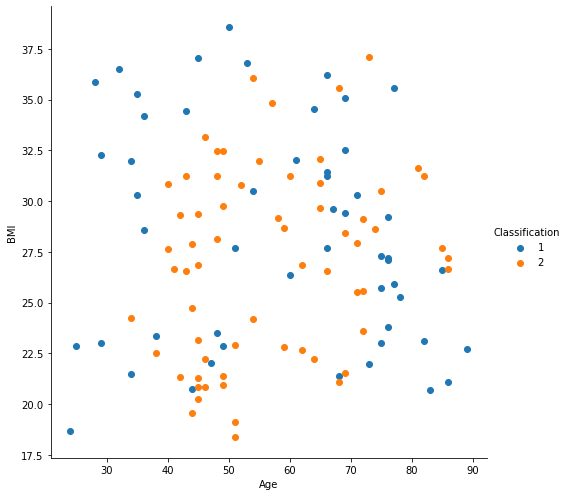

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(df, hue="Classification",size =7).map(plt.scatter, "Age", "BMI").add_legend()

ambil 4 kolom

In [15]:
x = df.iloc[:,0:4]
y = df.iloc[:,4]

x

,Age,BMI,Glucose,Insulin
0,48,23.500000,70,2.707
1,83,20.690495,92,3.115
2,82,23.124670,91,4.498
3,68,21.367521,77,3.226
4,86,21.111111,92,3.549
...,...,...,...,...
111,45,26.850000,92,3.330
112,62,26.840000,100,4.530
113,65,32.050000,97,5.730
114,72,25.590000,82,2.820


In [16]:
y

0      0.467409
1      0.706897
2      1.009651
3      0.612725
4      0.805386
         ...   
111    0.755688
112    1.117400
113    1.370998
114    0.570392
115    6.777364
Name: HOMA, Length: 116, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state=10)

x_train

,Age,BMI,Glucose,Insulin
87,85,27.688778,196,51.814
112,62,26.840000,100,4.530
67,64,22.222222,98,5.700
61,69,21.513859,112,6.683
82,48,32.461911,99,28.677
...,...,...,...,...
28,35,35.250761,90,6.817
64,59,22.832879,98,6.862
15,44,20.760000,86,7.553
100,74,28.650138,88,3.012


lakukan pengukuran untuk tampilan kelas yang akan dijadikan desision tree

In [18]:
y = df["Classification"]
X = df.drop(columns=["Classification"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(x, y)

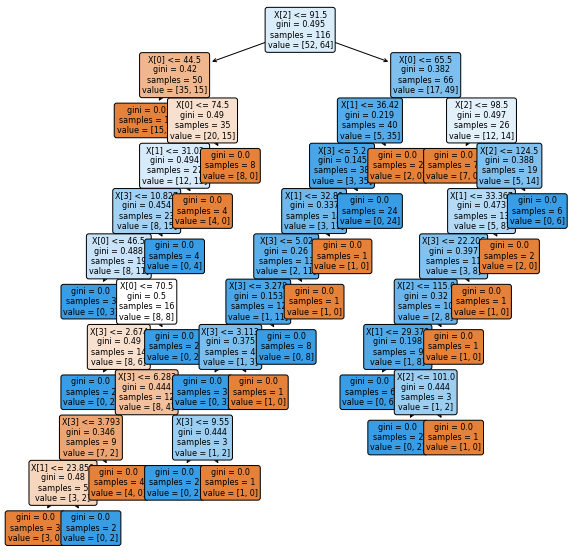

In [19]:
#plt the figure, setting a black background
plt.figure(figsize=(10,10))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()